## 우리의 목표: 승객의 정보를 입력하면 생존 여부를 예측해주는 모델을 만들어보자

## 작업환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic' #MalgunGothic
rcParams['figure.figsize']=17,8

import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv('test.csv', index_col=0)
print(test.shape)

(418, 10)


In [58]:
train=pd.read_csv('train.csv', index_col=0)
print(train.shape)
train

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## EDA

<AxesSubplot:xlabel='Pclass', ylabel='count'>

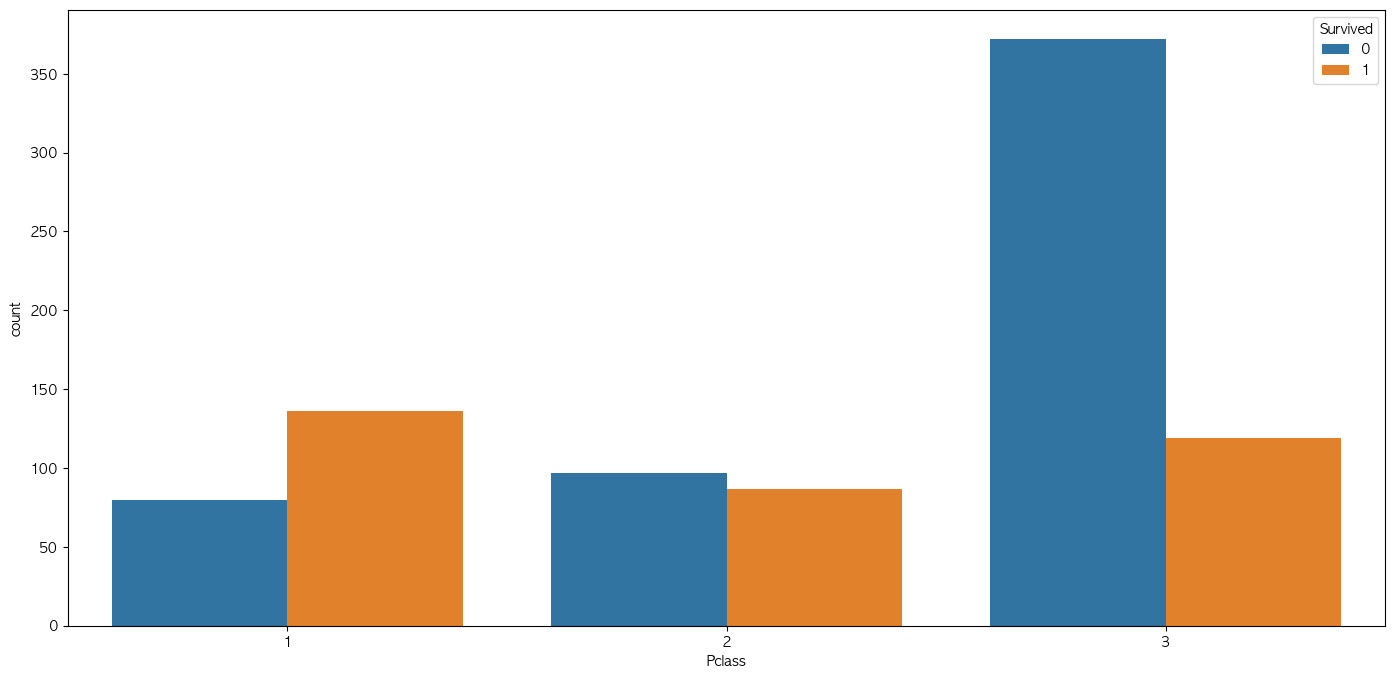

In [4]:
sns.countplot(data=train, x="Pclass", hue="Survived")

**Q. 승선위치 Embarked 컬럼이 비워져 있는 승객 2명을 찾아주세요**

In [5]:
test.loc[test.Fare.isnull(), "Fare"] = test.Fare.mean()

In [6]:
train[train.Embarked.isnull()] #%로 측정

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
train.shape

(891, 11)

In [8]:
train.Embarked.value_counts() / train.shape[0] * 100 #대다수인 S로 채우기

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [9]:
train.loc[train.Embarked.isnull(),'Embarked'] = "S"

## BarPlot

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

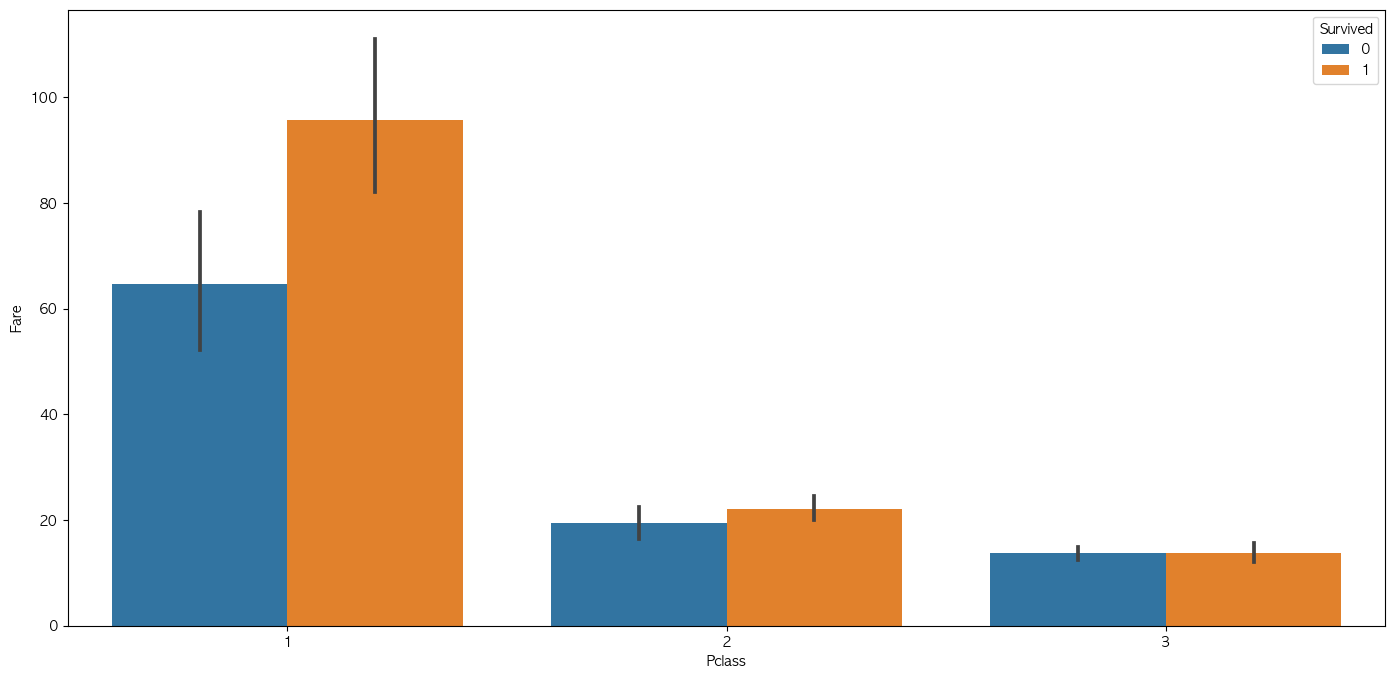

In [10]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

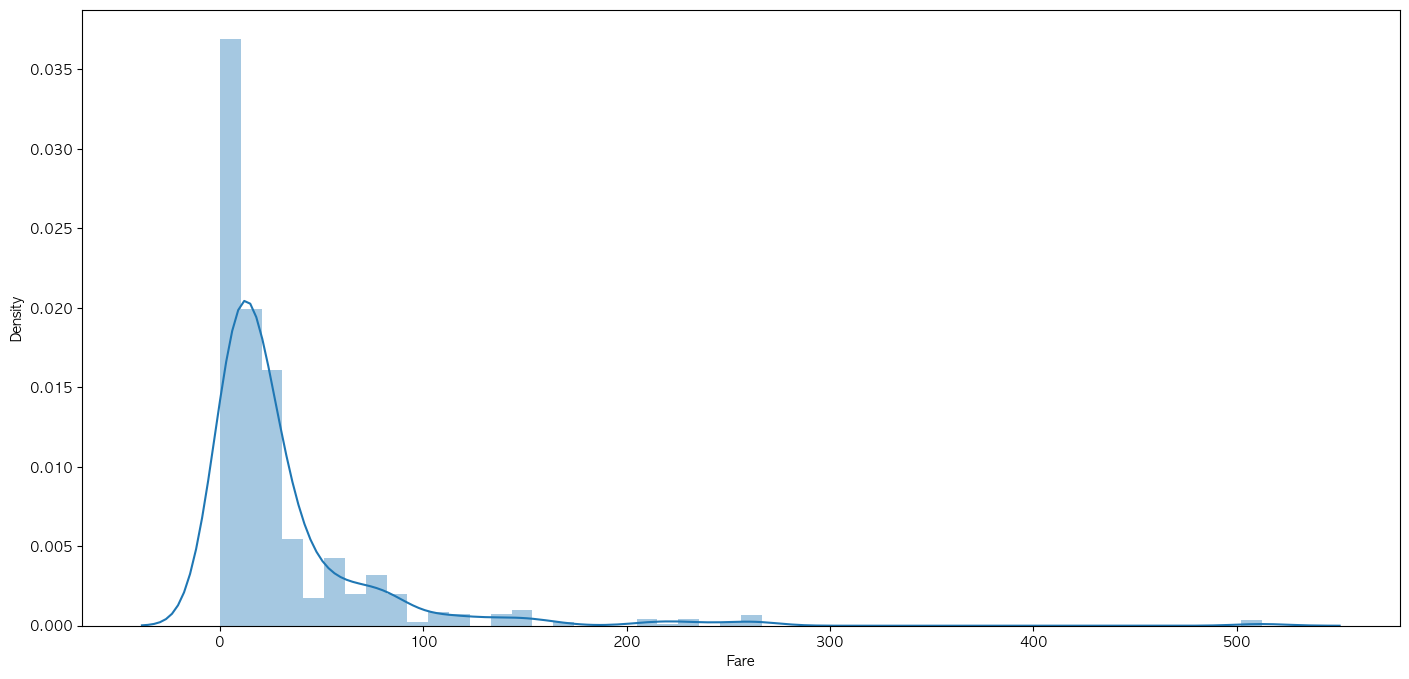

In [11]:
sns.distplot(train.Fare)

In [12]:
train[train.Fare > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


> **Q. 위 3명 승객의 요금을 1/4로 수정해주세요**

In [13]:
test.loc[test.Fare>500, 'Fare'] = 512/4

In [14]:
train.loc[train.Fare>500, 'Fare'] = 512/4

In [15]:
perish = train[train.Survived == 0]
survivor = train[train.Survived == 1]

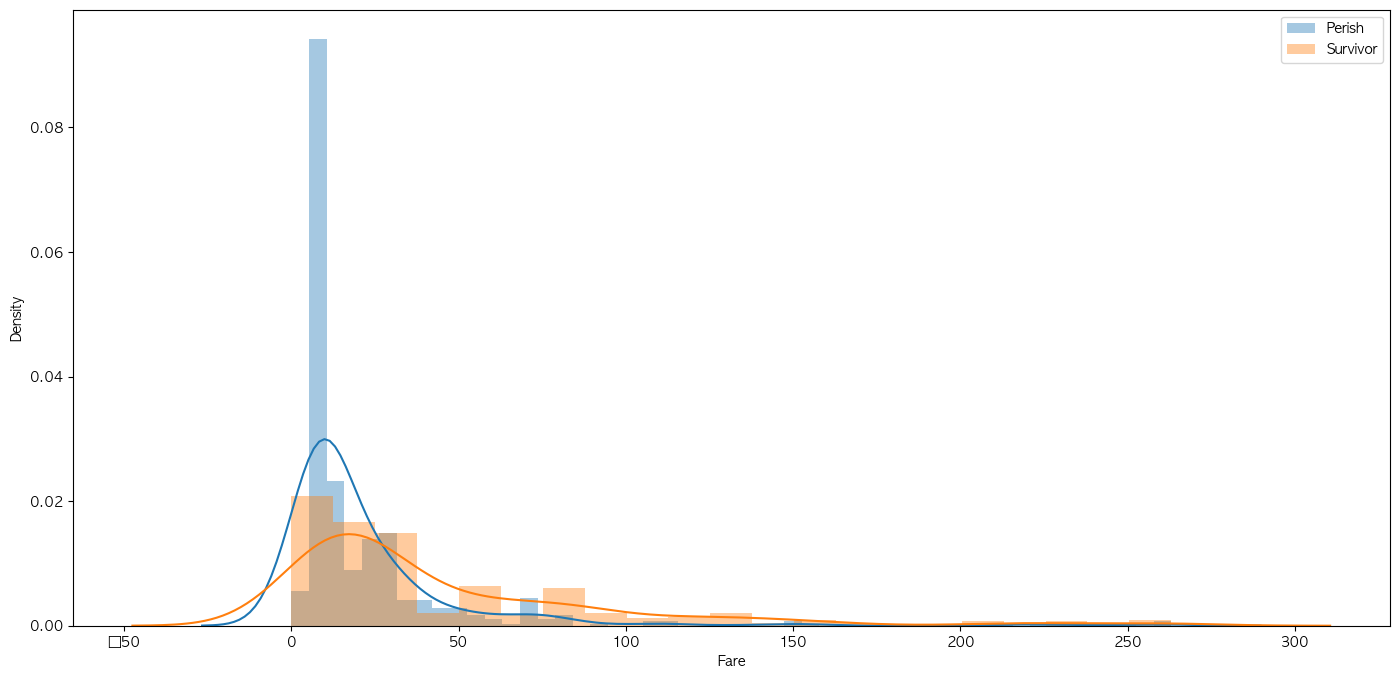

In [16]:
sns.distplot(perish.Fare, label="Perish")
sns.distplot(survivor.Fare, label="Survivor")
plt.legend()

# lmplot

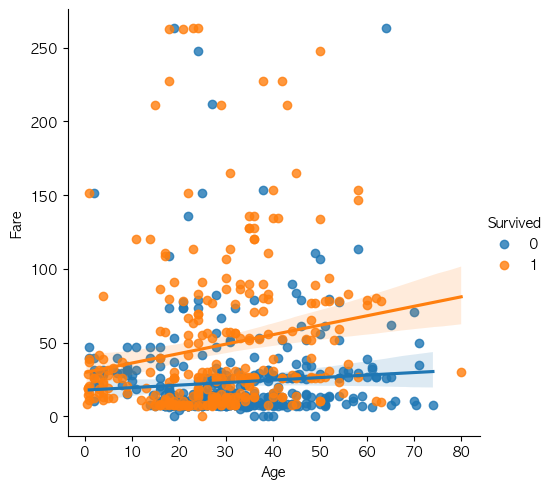

In [17]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived")

# Feature Engineering 특성공학

<AxesSubplot:xlabel='SibSp', ylabel='count'>

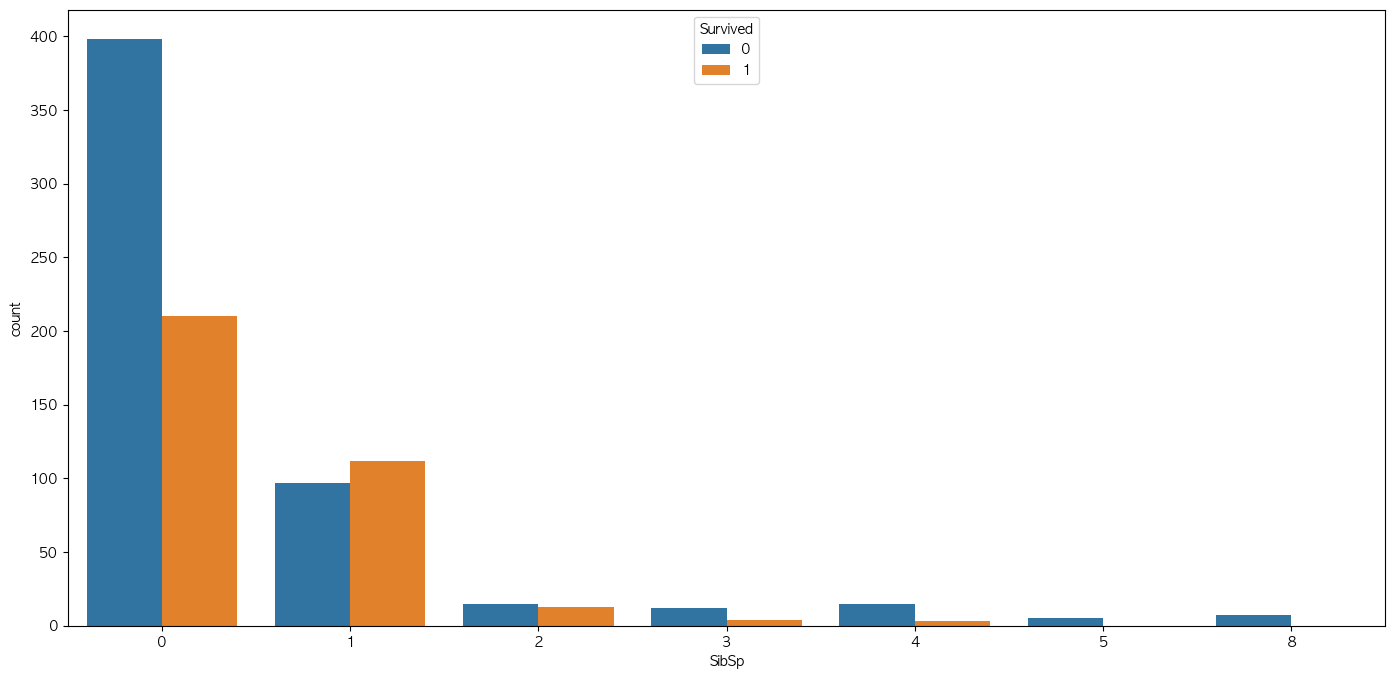

In [18]:
sns.countplot(data=train, x="SibSp", hue="Survived")

In [19]:
test['Family_Size'] = test.SibSp + test.Parch

In [20]:
train['Family_Size'] = train.SibSp + train.Parch

In [21]:
test.loc[test.Family_Size == 0, 'Alone'] = 1
test.loc[test.Family_Size != 0, 'Alone'] = 0

<AxesSubplot:xlabel='Alone', ylabel='count'>

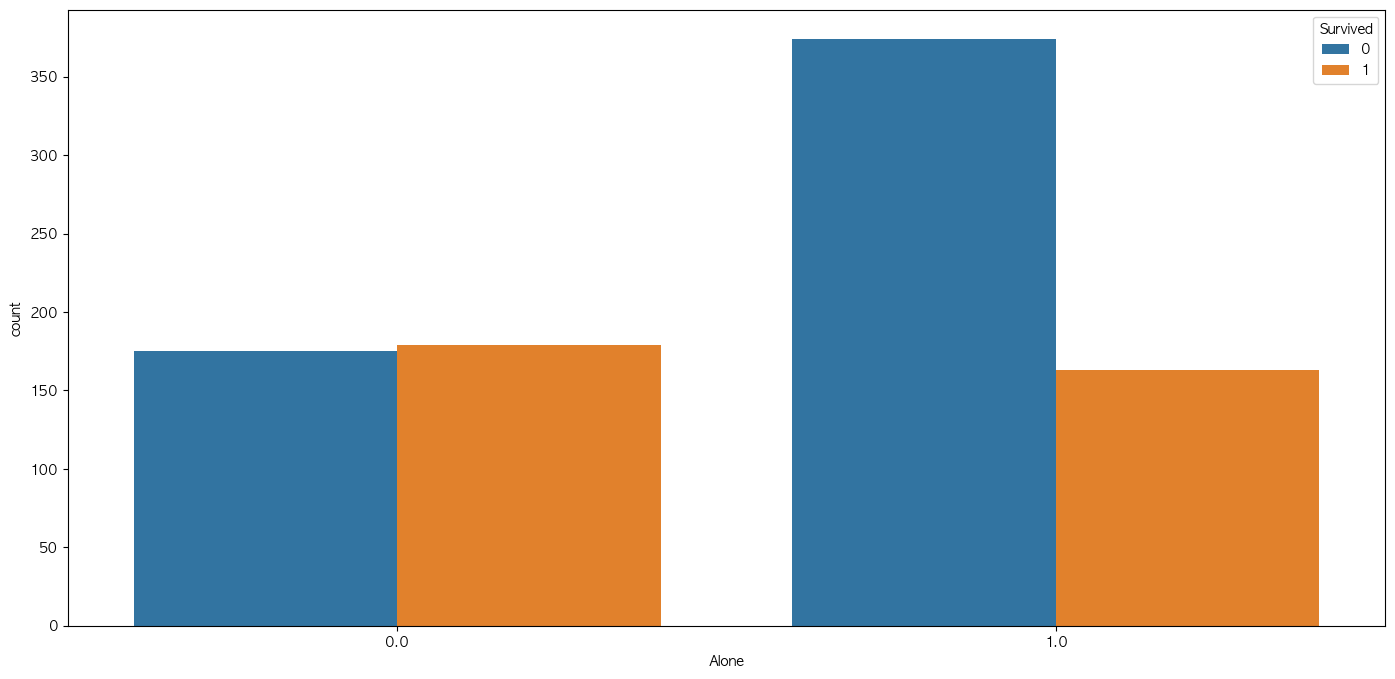

In [22]:
train.loc[train.Family_Size == 0, 'Alone'] = 1
train.loc[train.Family_Size != 0, 'Alone'] = 0
sns.countplot(data=train, x="Alone", hue="Survived")

In [23]:
train.Cabin.isnull().sum()/train.shape[0]

0.7710437710437711

In [24]:
test.loc[test.Cabin.isnull(), "Cabin_encode"] = 0
test.loc[test.Cabin.notnull(), "Cabin_encode"] = 1

In [25]:
train.loc[train.Cabin.isnull(), "Cabin_encode"] = 0
train.loc[train.Cabin.notnull(), "Cabin_encode"] = 1

<AxesSubplot:xlabel='Cabin_encode', ylabel='count'>

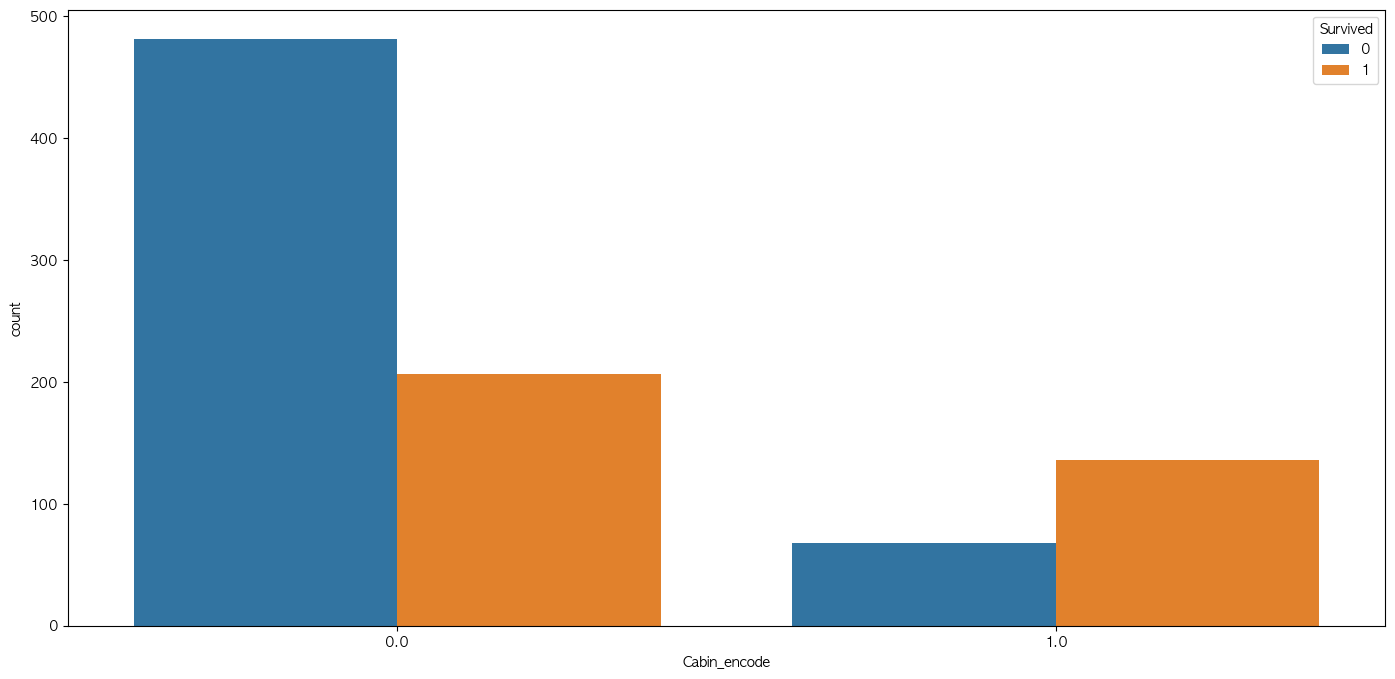

In [26]:
sns.countplot(data=train, x="Cabin_encode", hue="Survived")

In [27]:
train.Name.sample(40)

PassengerId
573                     Flynn, Mr. John Irwin ("Irving")
629                            Bostandyeff, Mr. Guentcho
806                            Johansson, Mr. Karl Johan
457                            Millet, Mr. Francis Davis
73                                  Hood, Mr. Ambrose Jr
236                         Harknett, Miss. Alice Phoebe
456                                   Jalsevac, Mr. Ivan
844                           Lemberopolous, Mr. Peter L
802          Collyer, Mrs. Harvey (Charlotte Annie Tate)
389                                 Sadlier, Mr. Matthew
823                      Reuchlin, Jonkheer. John George
703                                Barbara, Miss. Saiide
686               Laroche, Mr. Joseph Philippe Lemercier
289                                 Hosono, Mr. Masabumi
367     Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
510                                       Lang, Mr. Fang
572        Appleton, Mrs. Edward Dale (Charlotte Lamson)
186                

- 호칭을 잘라내는 함수를 정의

In [28]:
def find_title(name):
    return name.split(', ')[1].split('.')[0]

In [29]:
test['Title']=test.Name.apply(find_title)

In [30]:
train['Title']=train.Name.apply(find_title)

<AxesSubplot:xlabel='Title', ylabel='count'>

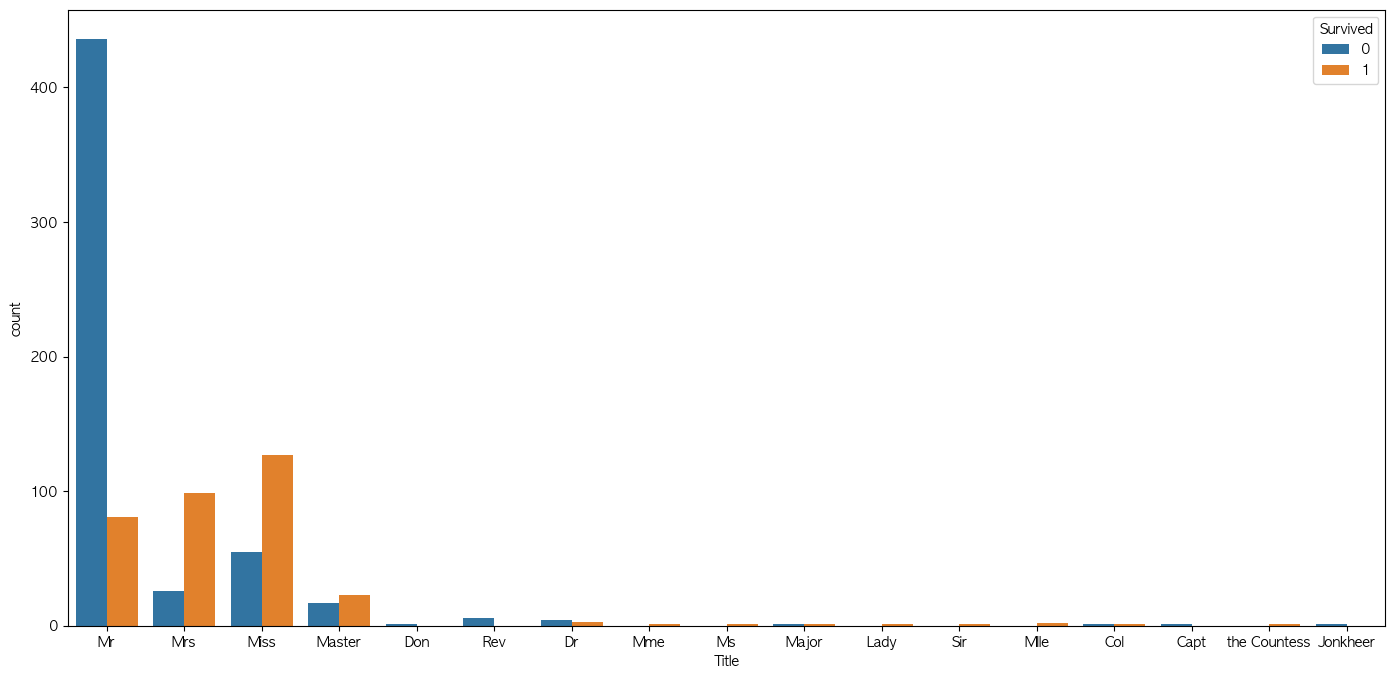

In [31]:
sns.countplot(data=train, x="Title", hue="Survived")

## 원핫인코딩 On hot encoding

In [32]:
embarked = pd.get_dummies(train.Embarked, prefix="E")

In [33]:
train = pd.concat([train, embarked], axis=1)

In [34]:
embarked = pd.get_dummies(test.Embarked, prefix="E")
train = pd.concat([test, embarked], axis=1)

In [35]:
train.loc[train.Title == 'Master', 'Master'] = 1
train.loc[train.Title != 'Master', 'Master'] = 0

In [36]:
test.loc[test.Title == 'Master', 'Master'] = 1
test.loc[test.Title != 'Master', 'Master'] = 0

In [37]:
train.loc[train.Sex == 'male', 'sex_encode'] = 0
train.loc[train.Sex == 'female', 'sex_encode'] = 1

In [38]:
test.loc[test.Sex == 'male', 'sex_encode'] = 0
test.loc[test.Sex == 'female', 'sex_encode'] = 1

In [39]:
train.Age.isnull().sum()/train.shape[0]

0.20574162679425836

In [40]:
train.Age.mean()

30.272590361445783

> **Q. 혹시 선실등급별 나이 평균에 차이가 있을까요? 1등석의 나이 평균, 2등석과 3등석의 나이 평균을 구해주세요**

In [41]:
train[train.Sex=='male'].Age.mean()

30.27273170731707

In [42]:
train[train.Sex=='female'].Age.mean()

30.27236220472441

> **Q. 선실등급과 성별을 둘 다 고려해서 평균을 찾아주세요**

In [43]:
m1 = train[(train.Sex=='male')&(train.Pclass==1)].Age.mean()

In [44]:
f1 = train[(train.Sex=='female')&(train.Pclass==1)].Age.mean()

In [45]:
m2 = train[(train.Sex=='male')&(train.Pclass==2)].Age.mean()

In [46]:
f2 = train[(train.Sex=='female')&(train.Pclass==2)].Age.mean()

In [47]:
m3 = train[(train.Sex=='male')&(train.Pclass==3)].Age.mean()

In [48]:
f3 = train[(train.Sex=='female')&(train.Pclass==3)].Age.mean()

In [49]:
train.loc[(train.Sex=='male')&(train.Pclass==1)&(train.Age.isnull()), "Age"] = m1

In [50]:
train.loc[(train.Sex=='male')&(train.Pclass==2)&(train.Age.isnull()), "Age"] = m2

In [51]:
train.loc[(train.Sex=='male')&(train.Pclass==3)&(train.Age.isnull()), "Age"] = m3

In [52]:
train.loc[(train.Sex=='female')&(train.Pclass==1)&(train.Age.isnull()), "Age"] = f1

In [53]:
train.loc[(train.Sex=='female')&(train.Pclass==2)&(train.Age.isnull()), "Age"] = f2

In [54]:
train.loc[(train.Sex=='female')&(train.Pclass==3)&(train.Age.isnull()), "Age"] = f3

In [55]:
test.loc[(test.Sex=='male')&(test.Pclass==1)&(test.Age.isnull()), "Age"] = m1
test.loc[(test.Sex=='male')&(test.Pclass==2)&(test.Age.isnull()), "Age"] = m2
test.loc[(test.Sex=='male')&(test.Pclass==3)&(test.Age.isnull()), "Age"] = m3
test.loc[(test.Sex=='female')&(test.Pclass==1)&(test.Age.isnull()), "Age"] = f1
test.loc[(test.Sex=='female')&(test.Pclass==2)&(test.Age.isnull()), "Age"] = f2
test.loc[(test.Sex=='female')&(test.Pclass==3)&(test.Age.isnull()), "Age"] = f3

<AxesSubplot:>

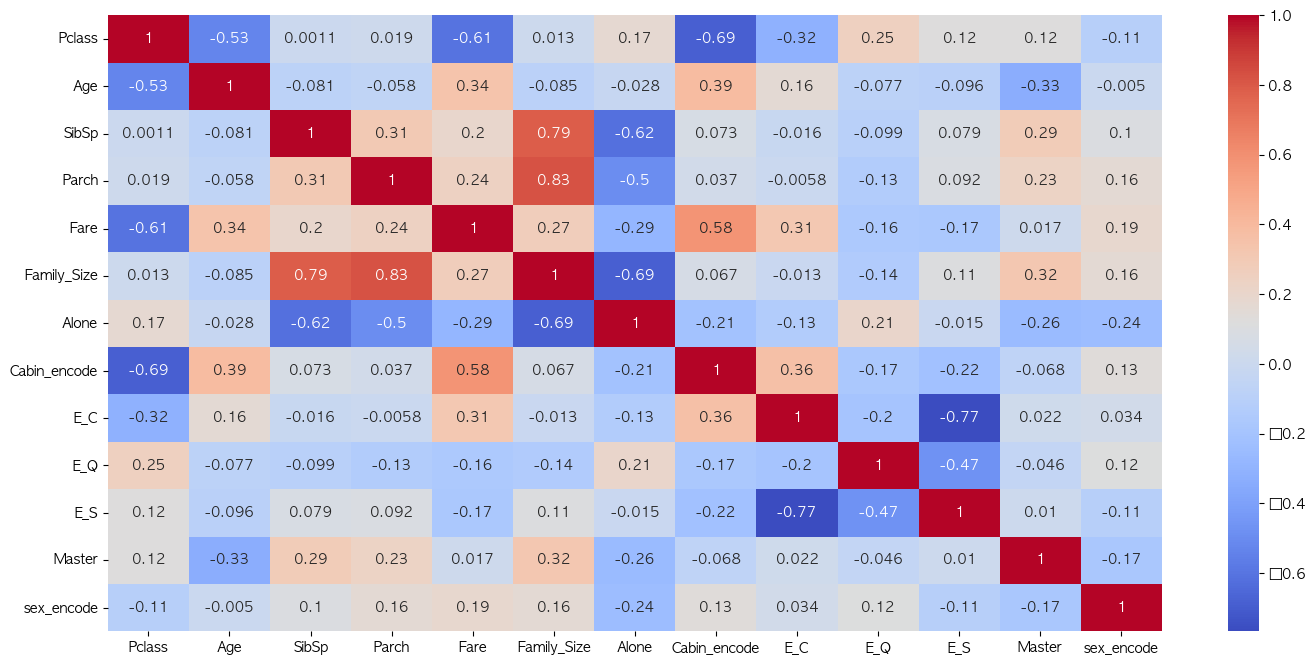

In [56]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
#공분산을 일으키는 변수는 추가하면 안 된다 예)SibSp와 Family_Size, Fare와 Pclass

In [57]:
train.corrwith(train.Survived).sort_values()

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [ ]:
feature = ["Pclass", "Alone", "sex_encode", "Fare", "E_S", "E_C"]

In [ ]:
X_train = train[feature]
y_train = train.Survived

In [ ]:
X_test = test[feature]
X_test.head

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators = 2000,
                                  max_depth = 5,
                                  max_features = 0.8,
                                  random_state = 31)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
submission = pd.read_csv("gender_submission.csv", index_col=0)
submission["Survived"] = prediction

In [ ]:
submission.to_csv("My_first_submission.csv")